In [1]:
import os
import glob
import json

import numpy as np

import imageio
import matplotlib.pyplot as plt

# import pickle

# import MBLab as mbl
# import transformations as tr
import HandBase as hm


In [39]:
PATH_TO_DATASET = 'test_data\\mbl\\2018.12.28\\'
frame_path_list = sorted(glob.glob(os.path.join(PATH_TO_DATASET, "*\\frame\\*.png")))
print(frame_path_list.__len__())

10


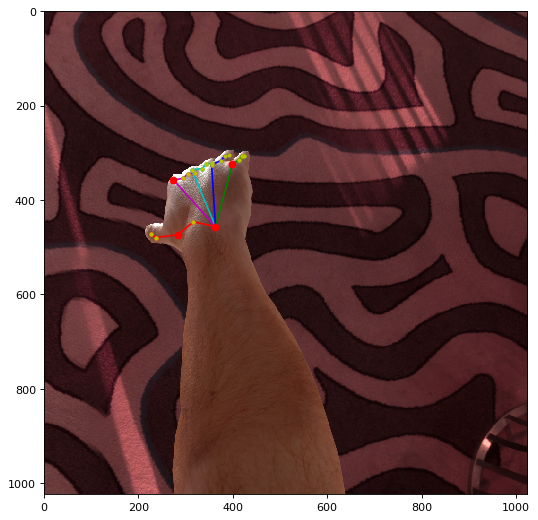

In [43]:
IMG_NUM = 0

frame_path = frame_path_list[IMG_NUM]

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
frame_data = imageio.imread(frame_path).astype(np.float)/255.
sz = frame_data.shape

skeleton2d_path = frame_path.replace('\\frame\\','\\skeleton_2d\\').replace('.png','.json')
skeleton3d_path = frame_path.replace('\\frame\\','\\skeleton_3d\\').replace('.png','.json')
camera_meta_path = frame_path.replace('\\frame\\','\\camera_meta\\').replace('.png','.json')
bg_mask_path = frame_path.replace('\\frame\\','\\background_mask\\')

with open(skeleton2d_path, 'r') as f:
    sk2d = json.load(f)

with open(skeleton3d_path, 'r') as f:
    sk3d = json.load(f)

with open(camera_meta_path, 'r') as f:
    cam_meta = json.load(f)

mblh = hm.MBLHand()
bh = hm.BaseHand()

pts3d = mblh.bones2pts3d(sk3d,lr='R')

dat2d = mblh.project_pts(pts3d, cam_meta, sz)

bh.plot_hand(dat2d)

plt.imshow(frame_data)
plt.show()